In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Dowloading DataSet
import tarfile
import os

HOUSING_PATH = './datasets/housing/housing.tgz'
def fetch_housing_data(f):
    housing_tgz = tarfile.open(f)
    housing_tgz.extractall()
    housing_tgz.close()

DATA_PATH = './datasets/housing'    
def load_housing_data(f):
    csv_path = os.path.join(f, 'housing.csv')
    return pd.read_csv(csv_path)

In [3]:
fetch_housing_data(HOUSING_PATH)
housing = load_housing_data(DATA_PATH)

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# To Check datatype, non-null value
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1113be8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111289860>]], dtype=object)

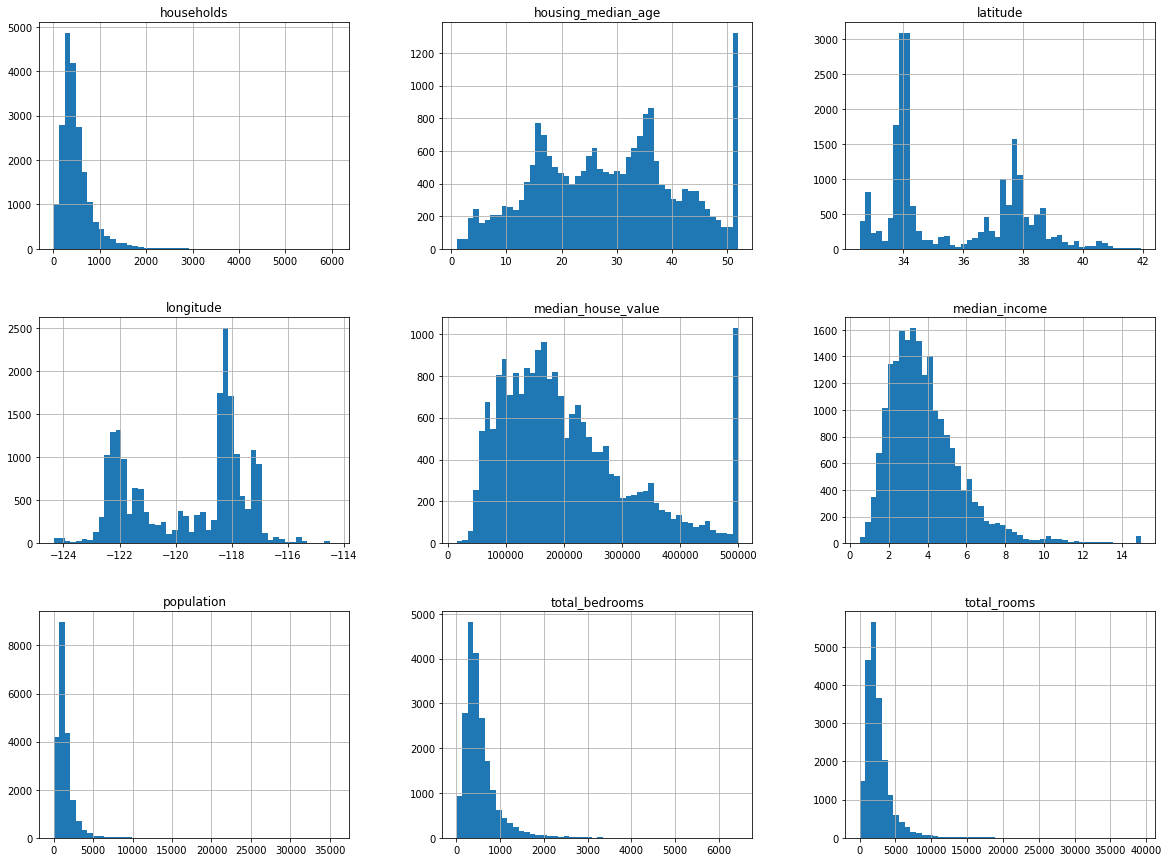

In [7]:
housing.hist(bins=50, figsize=(20,15))

In [8]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(shuffled_indices) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set),' train + ', len(test_set), ' test')

16512  train +  4128  test


In [10]:
# Take care of stratified sampling
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

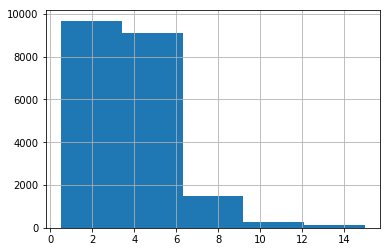

In [11]:
housing['median_income'].hist(bins=5)

In [12]:
# stratified sampling
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat']<5, 5.0, inplace=True)

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strart_test_set = housing.loc[test_index]

In [15]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [16]:
# varify stratified sampling
strart_test_set['income_cat'].value_counts() / len(strart_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [17]:
for s in (strat_train_set, strart_test_set):
    s.drop(['income_cat'], axis=1, inplace=True)

In [18]:
# Visualizing
housing = strat_train_set.copy()

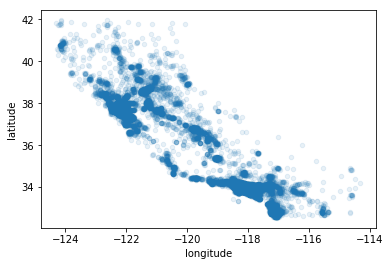

In [19]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

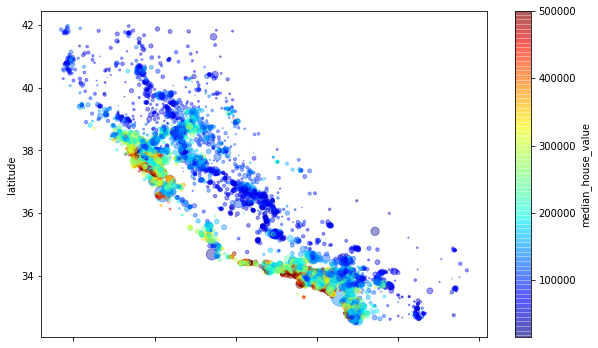

In [20]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population'] / 100,
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, figsize=(10,6))

In [21]:
# Looking For Correlations
corr_matrix = housing.corr()

In [22]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688234
total_rooms           0.136525
housing_median_age    0.103358
households            0.067889
total_bedrooms        0.051914
population           -0.022107
longitude            -0.042596
latitude             -0.146877
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111487a58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115e161d0>]], dtype=object)

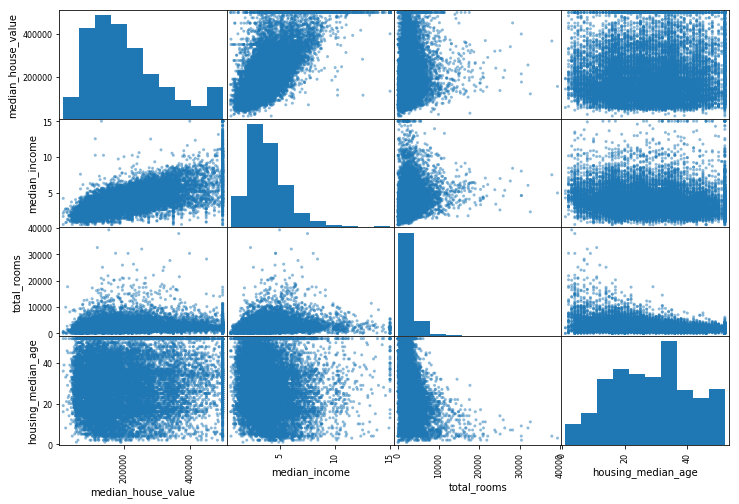

In [23]:
from pandas.plotting import  scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

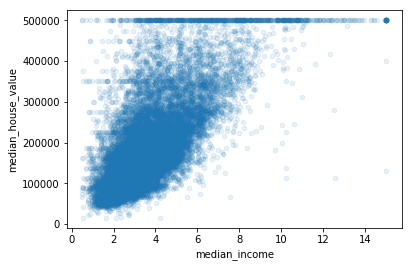

In [24]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [25]:
# Attribution Combinations
housing['room_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [26]:
corr_matrix = housing.corr()

In [27]:
corr_matrix['median_income'].sort_values(ascending=False)

median_income               1.000000
median_house_value          0.688234
room_per_household          0.341414
total_rooms                 0.199492
population_per_household    0.021161
households                  0.015638
population                  0.006633
total_bedrooms             -0.005071
longitude                  -0.012281
latitude                   -0.083392
housing_median_age         -0.116294
bedrooms_per_room          -0.613875
Name: median_income, dtype: float64

In [28]:
# Prepare data
housing = strat_train_set.drop('median_house_value' ,axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [29]:
# handle missing data
# housing.dropna(subset=['total_bedrooms']) # option 1
# housing.drop('total_bedrooms', axis=1) # option 2
# median = housing['total_bedrooms'].median() 
# housing['total_bedrooms'].fillna(median) # option 2

In [30]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
# data with all numberical attributes
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [31]:
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2127.    ,   435.    ,
        1166.    ,   410.    ,     3.5348])

In [32]:
housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2127.    ,   435.    ,
        1166.    ,   410.    ,     3.5348])

In [33]:
X = imputer.transform(housing_num)

In [34]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [35]:
# Handing Text and Categorical Attributes
from sklearn.preprocessing import  LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([1, 1, 0, ..., 1, 1, 0])

In [36]:
# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [37]:
housing_cat_1hot.toarray()

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]])

In [38]:
# Binary
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ..., 
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [134]:
# Custom Transforms
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix =3, 4, 5, 6
class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values
    
class NewLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        encoder = LabelBinarizer()
        return encoder.fit_transform(X)

In [82]:
attr_addr = CombineAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_addr.transform(housing.values)

In [83]:
# Transform Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [84]:
housing_num_str = num_pipeline.fit_transform(housing_num)

In [160]:
housing_num_str.shape

(16512, 11)

In [86]:
from sklearn.pipeline import FeatureUnion
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

In [87]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler())    
])

In [138]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', NewLabelBinarizer())
])

In [140]:
cat_pipeline.fit_transform(housing)

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ..., 
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [141]:
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [142]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.01977456,  1.62499653, -1.40350997, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11520123,  0.5200883 ,  1.85917287, ...,  0.        ,
         0.        ,  0.        ],
       [-1.04476278,  0.44049745, -1.40350997, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [-0.93981228,  1.33472403, -1.08519945, ...,  0.        ,
         0.        ,  0.        ],
       [-0.67493722,  1.40963306, -1.32393234, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.80436503, -0.88445607,  0.26762026, ...,  0.        ,
         0.        ,  0.        ]])

In [159]:
housing_prepared.shape, housing.shape

((16512, 16), (16512, 9))

In [143]:
# Select and Train a Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [164]:
some_data_prepared = housing_prepared[:5]
some_labels = housing_labels.iloc[:5]
print('Predictions: \t', lin_reg.predict(some_data_prepared))

Predictions: 	 [ 143160.  100056.  320928.  289152.  271520.]


In [166]:
print('Labels:\t\t', list(some_labels))

Labels:		 [123800.0, 55100.0, 291800.0, 322900.0, 272900.0]


In [168]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68382.033508481953

In [169]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [170]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions, housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [179]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                        scoring='neg_mean_squared_error', cv=10
                        )
tree_rmse_scores = np.sqrt(-scores)

In [180]:
def display_scores(scores):
    print('Scores:', scores)
    print('Means:', scores.mean())
    print('Standard deviation', scores.std())

In [181]:
display_scores(tree_rmse_scores)

Scores: [ 76343.64983191  72344.92883497  70115.42784208  69257.33225816
  71459.72850651  70663.41867005  68588.08286956  70734.54172994
  71611.07590094  71393.54625968]
Means: 71251.1732704
Standard deviation 2007.30286167


In [184]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                        scoring='neg_mean_squared_error', cv=10
                        )
lin_rmse_scores = np.sqrt(-scores)

In [185]:
display_scores(lin_rmse_scores)

Scores: [ 76343.64983191  72344.92883497  70115.42784208  69257.33225816
  71459.72850651  70663.41867005  68588.08286956  70734.54172994
  71611.07590094  71393.54625968]
Means: 71251.1732704
Standard deviation 2007.30286167


In [186]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = DecisionTreeRegressor()
forest_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [187]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_predictions, housing_labels)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0

In [188]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                        scoring='neg_mean_squared_error', cv=10
                        )
forest_rmse_scores = np.sqrt(-scores)

In [189]:
display_scores(forest_rmse)

Scores: 0.0
Means: 0.0
Standard deviation 0.0
